<a href="https://colab.research.google.com/github/aimanuel/JupyterNotebook/blob/main/5_Lending_Club_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import & Exploratory Data

In [ ]:
filepath ='/content/drive/MyDrive/13. Python/Machine Learning/TensorFlow_FILES/DATA/lending_club_exclude_outlier.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv(filepath)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,35000.0,36 months,25.83,1407.01,G,G2,HR Director,10+ years,RENT,165800.0,Verified,Mar-2014,Fully Paid,debt_consolidation,Debt consolidation,7.42,Jul-2005,5.0,0.0,16521.0,153.0,5.0,f,INDIVIDUAL,0.0,0.0,"7421 Pamela Pines Suite 835\nSouth Kyletown, O..."
1,12000.0,60 months,16.55,295.34,D,D2,NaN,NaN,MORTGAGE,45600.0,Verified,Nov-2015,Fully Paid,other,Other,38.98,Apr-2002,5.0,0.0,13880.0,152.5,11.0,f,INDIVIDUAL,5.0,0.0,"595 Hall Flat\nPort Heatherbury, NE 48052"
2,10000.0,36 months,14.16,342.56,C,C2,Superintendent,10+ years,OWN,91000.0,Not Verified,Apr-2014,Fully Paid,debt_consolidation,Debt consolidation,20.94,Jul-1997,9.0,0.0,9344.0,150.7,37.0,f,INDIVIDUAL,6.0,0.0,"159 Melanie Rue Suite 337\nJenniferview, WI 70466"
3,25000.0,60 months,20.49,669.19,E,E2,VP of MultiFamily Investments,5 years,RENT,100000.0,Source Verified,Apr-2014,Charged Off,debt_consolidation,Debt consolidation,15.16,Nov-2001,5.0,0.0,20133.0,148.0,7.0,w,INDIVIDUAL,0.0,0.0,"175 Martinez Corners Apt. 773\nNicholsland, VA..."
4,12600.0,36 months,8.39,397.11,A,A5,"AVP, Senior Leasing Assistant",8 years,MORTGAGE,96011.0,Not Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,11.56,Apr-1981,9.0,0.0,20033.0,146.1,22.0,w,INDIVIDUAL,4.0,0.0,"47969 Davis Divide Suite 571\nLake Daniel, OK ..."


In [ ]:
# categorical, using pd.dummies
df['term'].value_counts()

 36 months    298840
 60 months     92929
Name: term, dtype: int64

In [ ]:
# categorical, but convert into numerical or continuous
# because Grade A higher than grade G (each grade has different weight), so the continuous most fit to the model
df['grade'].nunique()

7

In [ ]:
df['grade'].unique()

array(['G', 'D', 'C', 'E', 'A', 'B', 'F'], dtype=object)

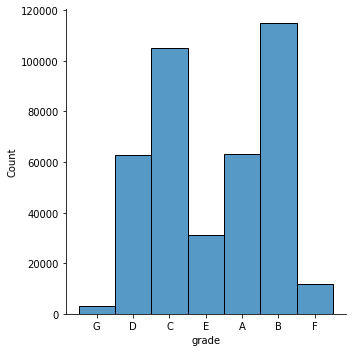

In [ ]:
# assumed grade from A-G, best - worst, let's check it
sns.displot(data=df,x='grade')

In [ ]:
# Grade A = 6.3% default
df[df['grade']=='A']['loan_status'].value_counts()

Fully Paid     59238
Charged Off     4005
Name: loan_status, dtype: int64

In [ ]:
# Grade D = 28.9% default
df[df['grade']=='D']['loan_status'].value_counts()

Fully Paid     44706
Charged Off    18212
Name: loan_status, dtype: int64

In [ ]:
# Grade G = 47.8% default
df[df['grade']=='G']['loan_status'].value_counts()

Fully Paid     1557
Charged Off    1444
Name: loan_status, dtype: int64

In [ ]:
# because Grade A higher than grade G (each grade has different weight), so the continuous most fit to the model
df['sub_grade'].nunique()

35

In [ ]:
df['sub_grade'].unique()

array(['G2', 'D2', 'C2', 'E2', 'A5', 'C1', 'D5', 'D4', 'D3', 'B4', 'C3',
       'C5', 'E5', 'D1', 'B2', 'B5', 'B1', 'C4', 'E1', 'F1', 'F3', 'B3',
       'E4', 'E3', 'F4', 'F2', 'G1', 'F5', 'G3', 'A2', 'A4', 'G4', 'G5',
       'A3', 'A1'], dtype=object)

In [ ]:
# categorical, but convert into numerical or continuous
df['emp_length'].nunique()

11

In [ ]:
# categorical, could use pd.dummies
# because each of these, has the same weights
# we couldn't rank which better than the other.
df['home_ownership'].value_counts()

MORTGAGE    195471
RENT        158834
OWN          37319
OTHER          111
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [ ]:
# categorical, could use pd.dummies
# because each of these, has the same weights
# we couldn't rank which better than the other. 
df['verification_status'].value_counts()

Verified           137640
Source Verified    129343
Not Verified       124786
Name: verification_status, dtype: int64

In [ ]:
# categorical, can use pd.dummies
# fully_paid = 1, charde off = 0
df['loan_status'].value_counts()

Fully Paid     314662
Charged Off     77107
Name: loan_status, dtype: int64

In [ ]:
# categorical, can use pd.dummies
# because each of these, has the same weights
# we couldn't rank which better than the other.
df['purpose'].nunique()

14

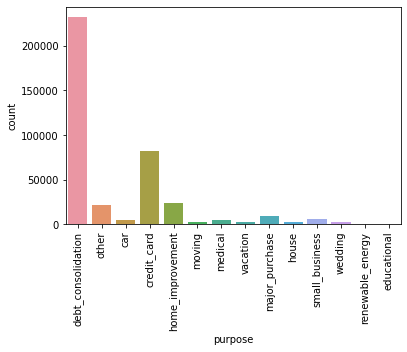

In [ ]:
#plt.figure(figsize=(15,5))
chart = sns.countplot(x='purpose',data=df);

chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

In [ ]:
# categorical, can be converted using pd dummies
# f = 1, w = 0
df['initial_list_status'].value_counts()

f    235747
w    156022
Name: initial_list_status, dtype: int64

In [ ]:
# categorical, can be converted using pd dummies
# because each of these, has the same weights
# we couldn't rank which better than the other.
df['application_type'].value_counts()

INDIVIDUAL    391072
JOINT            412
DIRECT_PAY       285
Name: application_type, dtype: int64

In [ ]:
# DELETE column Address
# we could extract the state & zip code, but it'll be too overkill, doesn't it?

# Testing Replace 'Grade' col with numerical

we're testing using separate dictionary, and matched it with Grade col

https://stackoverflow.com/questions/34962104/how-can-i-use-the-apply-function-for-a-single-column

In [ ]:
dict_grade = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}

In [ ]:
test_df = pd.DataFrame(df['grade'])

In [ ]:
test_df['num_grade']=test_df['grade'].apply(lambda i: dict_grade[i])
test_df.head(10)

,grade,num_grade
0,G,7
1,D,4
2,C,3
3,E,5
4,A,1
5,C,3
6,D,4
7,D,4
8,D,4
9,D,4


Create a list of possible combination Grade A-G, and subgrade 1-5

https://stackoverflow.com/questions/59100354/python-how-to-concatenate-all-possible-combinations-in-two-lists

In [ ]:
from itertools import product

In [ ]:
grade = ['A','B','C','D','E','F','G']

In [ ]:
sub_grade = []
for g1,g2 in product(grade, list(range(1,6))):
  sub_grade.append(g1+str(g2))

Combine 2 list Sub_grade & list(range(1,36), into dictionary using zip

https://www.geeksforgeeks.org/python-convert-two-lists-into-a-dictionary/

In [ ]:
dict_sub_grade = dict(zip(sub_grade, list(range(1,36))))

In [ ]:
dict_sub_grade

{'A1': 1,
 'A2': 2,
 'A3': 3,
 'A4': 4,
 'A5': 5,
 'B1': 6,
 'B2': 7,
 'B3': 8,
 'B4': 9,
 'B5': 10,
 'C1': 11,
 'C2': 12,
 'C3': 13,
 'C4': 14,
 'C5': 15,
 'D1': 16,
 'D2': 17,
 'D3': 18,
 'D4': 19,
 'D5': 20,
 'E1': 21,
 'E2': 22,
 'E3': 23,
 'E4': 24,
 'E5': 25,
 'F1': 26,
 'F2': 27,
 'F3': 28,
 'F4': 29,
 'F5': 30,
 'G1': 31,
 'G2': 32,
 'G3': 33,
 'G4': 34,
 'G5': 35}

# Back again at df

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,35000.0,36 months,25.83,1407.01,G,G2,HR Director,10+ years,RENT,165800.0,Verified,Mar-2014,Fully Paid,debt_consolidation,Debt consolidation,7.42,Jul-2005,5.0,0.0,16521.0,153.0,5.0,f,INDIVIDUAL,0.0,0.0,"7421 Pamela Pines Suite 835\nSouth Kyletown, O..."
1,12000.0,60 months,16.55,295.34,D,D2,NaN,NaN,MORTGAGE,45600.0,Verified,Nov-2015,Fully Paid,other,Other,38.98,Apr-2002,5.0,0.0,13880.0,152.5,11.0,f,INDIVIDUAL,5.0,0.0,"595 Hall Flat\nPort Heatherbury, NE 48052"
2,10000.0,36 months,14.16,342.56,C,C2,Superintendent,10+ years,OWN,91000.0,Not Verified,Apr-2014,Fully Paid,debt_consolidation,Debt consolidation,20.94,Jul-1997,9.0,0.0,9344.0,150.7,37.0,f,INDIVIDUAL,6.0,0.0,"159 Melanie Rue Suite 337\nJenniferview, WI 70466"
3,25000.0,60 months,20.49,669.19,E,E2,VP of MultiFamily Investments,5 years,RENT,100000.0,Source Verified,Apr-2014,Charged Off,debt_consolidation,Debt consolidation,15.16,Nov-2001,5.0,0.0,20133.0,148.0,7.0,w,INDIVIDUAL,0.0,0.0,"175 Martinez Corners Apt. 773\nNicholsland, VA..."
4,12600.0,36 months,8.39,397.11,A,A5,"AVP, Senior Leasing Assistant",8 years,MORTGAGE,96011.0,Not Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,11.56,Apr-1981,9.0,0.0,20033.0,146.1,22.0,w,INDIVIDUAL,4.0,0.0,"47969 Davis Divide Suite 571\nLake Daniel, OK ..."


# Start Replacing, Imputing Columns with Numerical or Categorical

## Replace 'Grade' with numerical

In [ ]:
df['grade']=df['grade'].apply(lambda i: dict_grade[i])

In [ ]:
df = df.drop('grade',axis=1)

## Replace 'sub_grade' with numerical

In [ ]:
df['sub_grade']=df['sub_grade'].apply(lambda i: dict_sub_grade[i])

## Replace 'term' into categorical 1s & 0s

In [ ]:
df['term'] = df['term'].astype('category')

In [ ]:
df['term'].value_counts()

 36 months    298840
 60 months     92929
Name: term, dtype: int64

In [ ]:
df['term'] = df['term'].cat.codes
df['term'].value_counts()

0    298840
1     92929
Name: term, dtype: int64

In [ ]:
df.rename(columns={'term': '60_mo_term'},inplace=True)
df.head()

,loan_amnt,60_mo_term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,35000.0,0,25.83,1407.01,32,HR Director,10+ years,RENT,165800.0,Verified,Mar-2014,Fully Paid,debt_consolidation,Debt consolidation,7.42,Jul-2005,5.0,0.0,16521.0,153.0,5.0,f,INDIVIDUAL,0.0,0.0,"7421 Pamela Pines Suite 835\nSouth Kyletown, O..."
1,12000.0,1,16.55,295.34,17,NaN,NaN,MORTGAGE,45600.0,Verified,Nov-2015,Fully Paid,other,Other,38.98,Apr-2002,5.0,0.0,13880.0,152.5,11.0,f,INDIVIDUAL,5.0,0.0,"595 Hall Flat\nPort Heatherbury, NE 48052"
2,10000.0,0,14.16,342.56,12,Superintendent,10+ years,OWN,91000.0,Not Verified,Apr-2014,Fully Paid,debt_consolidation,Debt consolidation,20.94,Jul-1997,9.0,0.0,9344.0,150.7,37.0,f,INDIVIDUAL,6.0,0.0,"159 Melanie Rue Suite 337\nJenniferview, WI 70466"
3,25000.0,1,20.49,669.19,22,VP of MultiFamily Investments,5 years,RENT,100000.0,Source Verified,Apr-2014,Charged Off,debt_consolidation,Debt consolidation,15.16,Nov-2001,5.0,0.0,20133.0,148.0,7.0,w,INDIVIDUAL,0.0,0.0,"175 Martinez Corners Apt. 773\nNicholsland, VA..."
4,12600.0,0,8.39,397.11,5,"AVP, Senior Leasing Assistant",8 years,MORTGAGE,96011.0,Not Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,11.56,Apr-1981,9.0,0.0,20033.0,146.1,22.0,w,INDIVIDUAL,4.0,0.0,"47969 Davis Divide Suite 571\nLake Daniel, OK ..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391769 entries, 0 to 391768
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             391769 non-null  float64
 1   60_mo_term            391769 non-null  int8   
 2   int_rate              391769 non-null  float64
 3   installment           391769 non-null  float64
 4   sub_grade             391769 non-null  int64  
 5   emp_title             369066 non-null  object 
 6   emp_length            373507 non-null  object 
 7   home_ownership        391769 non-null  object 
 8   annual_inc            391769 non-null  float64
 9   verification_status   391769 non-null  object 
 10  issue_d               391769 non-null  object 
 11  loan_status           391769 non-null  object 
 12  purpose               391769 non-null  object 
 13  title                 390033 non-null  object 
 14  dti                   391769 non-null  float64
 15  

## Replace 'home ownership' into categorical 1s & 0s

In [ ]:
cat_home_own = pd.get_dummies(df['home_ownership'])
cat_home_own.rename(columns={'ANY': 'HO_ANY', 'MORTGAGE':'HO_MORTGAGE','NONE':'HO_NONE',
                             'OTHER':'HO_OTHER','OWN':'HO_OWN','RENT':'HO_RENT'},inplace=True)
cat_home_own.head(2)

,HO_ANY,HO_MORTGAGE,HO_NONE,HO_OTHER,HO_OWN,HO_RENT
0,0,0,0,0,0,1
1,0,1,0,0,0,0


In [ ]:
df = pd.concat([df,cat_home_own],axis=1)
df.head()

,loan_amnt,60_mo_term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,HO_ANY,HO_MORTGAGE,HO_NONE,HO_OTHER,HO_OWN,HO_RENT
0,35000.0,0,25.83,1407.01,32,HR Director,10+ years,RENT,165800.0,Verified,Mar-2014,Fully Paid,debt_consolidation,Debt consolidation,7.42,Jul-2005,5.0,0.0,16521.0,153.0,5.0,f,INDIVIDUAL,0.0,0.0,"7421 Pamela Pines Suite 835\nSouth Kyletown, O...",0,0,0,0,0,1
1,12000.0,1,16.55,295.34,17,NaN,NaN,MORTGAGE,45600.0,Verified,Nov-2015,Fully Paid,other,Other,38.98,Apr-2002,5.0,0.0,13880.0,152.5,11.0,f,INDIVIDUAL,5.0,0.0,"595 Hall Flat\nPort Heatherbury, NE 48052",0,1,0,0,0,0
2,10000.0,0,14.16,342.56,12,Superintendent,10+ years,OWN,91000.0,Not Verified,Apr-2014,Fully Paid,debt_consolidation,Debt consolidation,20.94,Jul-1997,9.0,0.0,9344.0,150.7,37.0,f,INDIVIDUAL,6.0,0.0,"159 Melanie Rue Suite 337\nJenniferview, WI 70466",0,0,0,0,1,0
3,25000.0,1,20.49,669.19,22,VP of MultiFamily Investments,5 years,RENT,100000.0,Source Verified,Apr-2014,Charged Off,debt_consolidation,Debt consolidation,15.16,Nov-2001,5.0,0.0,20133.0,148.0,7.0,w,INDIVIDUAL,0.0,0.0,"175 Martinez Corners Apt. 773\nNicholsland, VA...",0,0,0,0,0,1
4,12600.0,0,8.39,397.11,5,"AVP, Senior Leasing Assistant",8 years,MORTGAGE,96011.0,Not Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,11.56,Apr-1981,9.0,0.0,20033.0,146.1,22.0,w,INDIVIDUAL,4.0,0.0,"47969 Davis Divide Suite 571\nLake Daniel, OK ...",0,1,0,0,0,0


In [ ]:
df = df.drop('home_ownership',axis=1)
df.head(2)

,loan_amnt,60_mo_term,int_rate,installment,sub_grade,emp_title,emp_length,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,HO_ANY,HO_MORTGAGE,HO_NONE,HO_OTHER,HO_OWN,HO_RENT
0,35000.0,0,25.83,1407.01,32,HR Director,10+ years,165800.0,Verified,Mar-2014,Fully Paid,debt_consolidation,Debt consolidation,7.42,Jul-2005,5.0,0.0,16521.0,153.0,5.0,f,INDIVIDUAL,0.0,0.0,"7421 Pamela Pines Suite 835\nSouth Kyletown, O...",0,0,0,0,0,1
1,12000.0,1,16.55,295.34,17,NaN,NaN,45600.0,Verified,Nov-2015,Fully Paid,other,Other,38.98,Apr-2002,5.0,0.0,13880.0,152.5,11.0,f,INDIVIDUAL,5.0,0.0,"595 Hall Flat\nPort Heatherbury, NE 48052",0,1,0,0,0,0


## Replace 'Verification Status' into categorical 1s & 0s

In [ ]:
df['verification_status'].value_counts()

Verified           137640
Source Verified    129343
Not Verified       124786
Name: verification_status, dtype: int64

In [ ]:
cat_ver_stat = pd.get_dummies(df['verification_status'])
cat_ver_stat.rename(columns={'Verified': 'VS_Verified', 'Source Verified':'VS_Source Verified',
                             'Not Verified':'VS_Not Verified',},inplace=True)
cat_ver_stat.head(2)

,VS_Not Verified,VS_Source Verified,VS_Verified
0,0,0,1
1,0,0,1


In [ ]:
df = pd.concat([df,cat_ver_stat],axis=1)
df = df.drop('verification_status',axis=1)
df.head(2)

,loan_amnt,60_mo_term,int_rate,installment,sub_grade,emp_title,emp_length,annual_inc,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,HO_ANY,HO_MORTGAGE,HO_NONE,HO_OTHER,HO_OWN,HO_RENT,VS_Not Verified,VS_Source Verified,VS_Verified
0,35000.0,0,25.83,1407.01,32,HR Director,10+ years,165800.0,Mar-2014,Fully Paid,debt_consolidation,Debt consolidation,7.42,Jul-2005,5.0,0.0,16521.0,153.0,5.0,f,INDIVIDUAL,0.0,0.0,"7421 Pamela Pines Suite 835\nSouth Kyletown, O...",0,0,0,0,0,1,0,0,1
1,12000.0,1,16.55,295.34,17,NaN,NaN,45600.0,Nov-2015,Fully Paid,other,Other,38.98,Apr-2002,5.0,0.0,13880.0,152.5,11.0,f,INDIVIDUAL,5.0,0.0,"595 Hall Flat\nPort Heatherbury, NE 48052",0,1,0,0,0,0,0,0,1


## Replace 'Loan Status' with 1s & 0s

In [ ]:
df['loan_status'].value_counts()

Fully Paid     314662
Charged Off     77107
Name: loan_status, dtype: int64

In [ ]:
dict_loanstat = {'Fully Paid':1,'Charged Off':0}

In [ ]:
df['loan_status']=df['loan_status'].apply(lambda i: dict_loanstat[i])
df.head()

,loan_amnt,60_mo_term,int_rate,installment,sub_grade,emp_title,emp_length,annual_inc,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,HO_ANY,HO_MORTGAGE,HO_NONE,HO_OTHER,HO_OWN,HO_RENT,VS_Not Verified,VS_Source Verified,VS_Verified
0,35000.0,0,25.83,1407.01,32,HR Director,10+ years,165800.0,Mar-2014,1,debt_consolidation,Debt consolidation,7.42,Jul-2005,5.0,0.0,16521.0,153.0,5.0,f,INDIVIDUAL,0.0,0.0,"7421 Pamela Pines Suite 835\nSouth Kyletown, O...",0,0,0,0,0,1,0,0,1
1,12000.0,1,16.55,295.34,17,NaN,NaN,45600.0,Nov-2015,1,other,Other,38.98,Apr-2002,5.0,0.0,13880.0,152.5,11.0,f,INDIVIDUAL,5.0,0.0,"595 Hall Flat\nPort Heatherbury, NE 48052",0,1,0,0,0,0,0,0,1
2,10000.0,0,14.16,342.56,12,Superintendent,10+ years,91000.0,Apr-2014,1,debt_consolidation,Debt consolidation,20.94,Jul-1997,9.0,0.0,9344.0,150.7,37.0,f,INDIVIDUAL,6.0,0.0,"159 Melanie Rue Suite 337\nJenniferview, WI 70466",0,0,0,0,1,0,1,0,0
3,25000.0,1,20.49,669.19,22,VP of MultiFamily Investments,5 years,100000.0,Apr-2014,0,debt_consolidation,Debt consolidation,15.16,Nov-2001,5.0,0.0,20133.0,148.0,7.0,w,INDIVIDUAL,0.0,0.0,"175 Martinez Corners Apt. 773\nNicholsland, VA...",0,0,0,0,0,1,0,1,0
4,12600.0,0,8.39,397.11,5,"AVP, Senior Leasing Assistant",8 years,96011.0,Oct-2014,1,debt_consolidation,Debt consolidation,11.56,Apr-1981,9.0,0.0,20033.0,146.1,22.0,w,INDIVIDUAL,4.0,0.0,"47969 Davis Divide Suite 571\nLake Daniel, OK ...",0,1,0,0,0,0,1,0,0


In [ ]:
# I made mistakes it should be 'Fully Paid':1,'Charged Off':0
# lambda x : True if (x > 10 and x < 20) else False
# df['loan_status']=df['loan_status'].apply(lambda i: i+1 if i==0 else i-1)
df.head()

,loan_amnt,60_mo_term,int_rate,installment,grade,sub_grade,emp_title,emp_length,annual_inc,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,HO_ANY,HO_MORTGAGE,HO_NONE,HO_OTHER,HO_OWN,HO_RENT,VS_Not Verified,VS_Source Verified,VS_Verified
0,35000.0,0,25.83,1407.01,7,32,HR Director,10+ years,165800.0,Mar-2014,1,debt_consolidation,Debt consolidation,7.42,Jul-2005,5.0,0.0,16521.0,153.0,5.0,f,INDIVIDUAL,0.0,0.0,"7421 Pamela Pines Suite 835\nSouth Kyletown, O...",0,0,0,0,0,1,0,0,1
1,12000.0,1,16.55,295.34,4,17,NaN,NaN,45600.0,Nov-2015,1,other,Other,38.98,Apr-2002,5.0,0.0,13880.0,152.5,11.0,f,INDIVIDUAL,5.0,0.0,"595 Hall Flat\nPort Heatherbury, NE 48052",0,1,0,0,0,0,0,0,1
2,10000.0,0,14.16,342.56,3,12,Superintendent,10+ years,91000.0,Apr-2014,1,debt_consolidation,Debt consolidation,20.94,Jul-1997,9.0,0.0,9344.0,150.7,37.0,f,INDIVIDUAL,6.0,0.0,"159 Melanie Rue Suite 337\nJenniferview, WI 70466",0,0,0,0,1,0,1,0,0
3,25000.0,1,20.49,669.19,5,22,VP of MultiFamily Investments,5 years,100000.0,Apr-2014,0,debt_consolidation,Debt consolidation,15.16,Nov-2001,5.0,0.0,20133.0,148.0,7.0,w,INDIVIDUAL,0.0,0.0,"175 Martinez Corners Apt. 773\nNicholsland, VA...",0,0,0,0,0,1,0,1,0
4,12600.0,0,8.39,397.11,1,5,"AVP, Senior Leasing Assistant",8 years,96011.0,Oct-2014,1,debt_consolidation,Debt consolidation,11.56,Apr-1981,9.0,0.0,20033.0,146.1,22.0,w,INDIVIDUAL,4.0,0.0,"47969 Davis Divide Suite 571\nLake Daniel, OK ...",0,1,0,0,0,0,1,0,0


## Replace 'Purpose' with 1s & 0s

In [ ]:
df['purpose'].unique()

array(['debt_consolidation', 'other', 'car', 'credit_card',
       'home_improvement', 'moving', 'medical', 'vacation',
       'major_purchase', 'house', 'small_business', 'wedding',
       'renewable_energy', 'educational'], dtype=object)

In [ ]:
cat_purpose = pd.get_dummies(df['purpose'])
cat_purpose.rename(columns={'vacation':'PPS_vacation', 'debt_consolidation':'PPS_debtcons', 
                            'credit_card':'PPS_cc','home_improvement':'PPS_homeimp', 
                            'small_business':'PPS_smallbus', 'major_purchase':'PPS_majorprc', 
                            'other':'PPS_other','medical':'PPS_medical', 
                            'wedding':'PPS_wedd', 'car':'PPS_car', 
                            'moving':'PPS_moving', 'house':'PPS_house', 
                            'educational':'PPS_edu','renewable_energy':'PPS_reneweng'},inplace=True)
cat_purpose.head()

,PPS_car,PPS_cc,PPS_debtcons,PPS_edu,PPS_homeimp,PPS_house,PPS_majorprc,PPS_medical,PPS_moving,PPS_other,PPS_reneweng,PPS_smallbus,PPS_vacation,PPS_wedd
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.concat([df,cat_purpose],axis=1)
df = df.drop('purpose',axis=1)
df.head()

,loan_amnt,60_mo_term,int_rate,installment,sub_grade,emp_title,emp_length,annual_inc,issue_d,loan_status,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,HO_ANY,HO_MORTGAGE,HO_NONE,HO_OTHER,HO_OWN,HO_RENT,VS_Not Verified,VS_Source Verified,VS_Verified,PPS_car,PPS_cc,PPS_debtcons,PPS_edu,PPS_homeimp,PPS_house,PPS_majorprc,PPS_medical,PPS_moving,PPS_other,PPS_reneweng,PPS_smallbus,PPS_vacation,PPS_wedd
0,35000.0,0,25.83,1407.01,32,HR Director,10+ years,165800.0,Mar-2014,1,Debt consolidation,7.42,Jul-2005,5.0,0.0,16521.0,153.0,5.0,f,INDIVIDUAL,0.0,0.0,"7421 Pamela Pines Suite 835\nSouth Kyletown, O...",0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12000.0,1,16.55,295.34,17,NaN,NaN,45600.0,Nov-2015,1,Other,38.98,Apr-2002,5.0,0.0,13880.0,152.5,11.0,f,INDIVIDUAL,5.0,0.0,"595 Hall Flat\nPort Heatherbury, NE 48052",0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,10000.0,0,14.16,342.56,12,Superintendent,10+ years,91000.0,Apr-2014,1,Debt consolidation,20.94,Jul-1997,9.0,0.0,9344.0,150.7,37.0,f,INDIVIDUAL,6.0,0.0,"159 Melanie Rue Suite 337\nJenniferview, WI 70466",0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,25000.0,1,20.49,669.19,22,VP of MultiFamily Investments,5 years,100000.0,Apr-2014,0,Debt consolidation,15.16,Nov-2001,5.0,0.0,20133.0,148.0,7.0,w,INDIVIDUAL,0.0,0.0,"175 Martinez Corners Apt. 773\nNicholsland, VA...",0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,12600.0,0,8.39,397.11,5,"AVP, Senior Leasing Assistant",8 years,96011.0,Oct-2014,1,Debt consolidation,11.56,Apr-1981,9.0,0.0,20033.0,146.1,22.0,w,INDIVIDUAL,4.0,0.0,"47969 Davis Divide Suite 571\nLake Daniel, OK ...",0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Drop 'title' & 'emp_title'

In [ ]:
df = df.drop('title',axis=1)

In [ ]:
df = df.drop('emp_title',axis=1)
df

,loan_amnt,60_mo_term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,HO_ANY,HO_MORTGAGE,HO_NONE,HO_OTHER,HO_OWN,HO_RENT,VS_Not Verified,VS_Source Verified,VS_Verified,PPS_car,PPS_cc,PPS_debtcons,PPS_edu,PPS_homeimp,PPS_house,PPS_majorprc,PPS_medical,PPS_moving,PPS_other,PPS_reneweng,PPS_smallbus,PPS_vacation,PPS_wedd
0,35000.0,0,25.83,1407.01,32,10+ years,165800.0,Mar-2014,1,7.42,Jul-2005,5.0,0.0,16521.0,153.0,5.0,f,INDIVIDUAL,0.0,0.0,"7421 Pamela Pines Suite 835\nSouth Kyletown, O...",0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12000.0,1,16.55,295.34,17,NaN,45600.0,Nov-2015,1,38.98,Apr-2002,5.0,0.0,13880.0,152.5,11.0,f,INDIVIDUAL,5.0,0.0,"595 Hall Flat\nPort Heatherbury, NE 48052",0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,10000.0,0,14.16,342.56,12,10+ years,91000.0,Apr-2014,1,20.94,Jul-1997,9.0,0.0,9344.0,150.7,37.0,f,INDIVIDUAL,6.0,0.0,"159 Melanie Rue Suite 337\nJenniferview, WI 70466",0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,25000.0,1,20.49,669.19,22,5 years,100000.0,Apr-2014,0,15.16,Nov-2001,5.0,0.0,20133.0,148.0,7.0,w,INDIVIDUAL,0.0,0.0,"175 Martinez Corners Apt. 773\nNicholsland, VA...",0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,12600.0,0,8.39,397.11,5,8 years,96011.0,Oct-2014,1,11.56,Apr-1981,9.0,0.0,20033.0,146.1,22.0,w,INDIVIDUAL,4.0,0.0,"47969 Davis Divide Suite 571\nLake Daniel, OK ...",0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391764,35000.0,0,24.83,1388.45,32,10+ years,84000.0,Jun-2013,0,28.67,Apr-1989,8.0,0.0,21400.0,NaN,55.0,w,INDIVIDUAL,3.0,0.0,"023 Smith Shoal Suite 177\nSouth Benjaminfort,...",0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
391765,15000.0,1,29.96,484.94,34,3 years,75000.0,May-2016,1,23.63,Apr-1996,7.0,0.0,177665.0,NaN,29.0,f,INDIVIDUAL,4.0,0.0,"70525 Joseph Loaf Apt. 877\nJillchester, MN 05113",0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
391766,22750.0,0,23.91,891.48,34,10+ years,74000.0,Jan-2012,1,22.33,Mar-2000,2.0,0.0,0.0,NaN,17.0,f,INDIVIDUAL,NaN,0.0,"886 Lam Plains Apt. 588\nEast Georgeport, VT 3...",0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
391767,24000.0,1,24.11,691.97,35,10+ years,56000.0,Feb-2012,1,11.96,Nov-1997,4.0,0.0,0.0,NaN,19.0,f,INDIVIDUAL,NaN,0.0,"PSC 7212, Box 9412\nAPO AA 48052",0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Replace 'initial_list_status' with 1 & 0

In [ ]:
df['initial_list_status'].value_counts()

f    235747
w    156022
Name: initial_list_status, dtype: int64

In [ ]:
dict_initial_list_stat = {'f':1,'w':0}

In [ ]:
df['initial_list_status']=df['initial_list_status'].apply(lambda i: dict_initial_list_stat[i])

In [ ]:
df.head()

,loan_amnt,60_mo_term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,HO_ANY,HO_MORTGAGE,HO_NONE,HO_OTHER,HO_OWN,HO_RENT,VS_Not Verified,VS_Source Verified,VS_Verified,PPS_car,PPS_cc,PPS_debtcons,PPS_edu,PPS_homeimp,PPS_house,PPS_majorprc,PPS_medical,PPS_moving,PPS_other,PPS_reneweng,PPS_smallbus,PPS_vacation,PPS_wedd
0,35000.0,0,25.83,1407.01,32,10+ years,165800.0,Mar-2014,1,7.42,Jul-2005,5.0,0.0,16521.0,153.0,5.0,1,INDIVIDUAL,0.0,0.0,"7421 Pamela Pines Suite 835\nSouth Kyletown, O...",0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12000.0,1,16.55,295.34,17,NaN,45600.0,Nov-2015,1,38.98,Apr-2002,5.0,0.0,13880.0,152.5,11.0,1,INDIVIDUAL,5.0,0.0,"595 Hall Flat\nPort Heatherbury, NE 48052",0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,10000.0,0,14.16,342.56,12,10+ years,91000.0,Apr-2014,1,20.94,Jul-1997,9.0,0.0,9344.0,150.7,37.0,1,INDIVIDUAL,6.0,0.0,"159 Melanie Rue Suite 337\nJenniferview, WI 70466",0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,25000.0,1,20.49,669.19,22,5 years,100000.0,Apr-2014,0,15.16,Nov-2001,5.0,0.0,20133.0,148.0,7.0,0,INDIVIDUAL,0.0,0.0,"175 Martinez Corners Apt. 773\nNicholsland, VA...",0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,12600.0,0,8.39,397.11,5,8 years,96011.0,Oct-2014,1,11.56,Apr-1981,9.0,0.0,20033.0,146.1,22.0,0,INDIVIDUAL,4.0,0.0,"47969 Davis Divide Suite 571\nLake Daniel, OK ...",0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Replace 'application_type' with 1s & 0s

In [ ]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [ ]:
cat_app_type = pd.get_dummies(df['application_type'])
cat_app_type.rename(columns={'INDIVIDUAL':'APP_INDIVIDUAL', 'JOINT':'APP_JOINT', 
                            'DIRECT_PAY':'APP_DIRECTPAY'},inplace=True)

In [ ]:
df = pd.concat([df,cat_app_type],axis=1)
df = df.drop('application_type',axis=1)

In [ ]:
df.head()

,loan_amnt,60_mo_term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,address,HO_ANY,HO_MORTGAGE,HO_NONE,HO_OTHER,HO_OWN,HO_RENT,VS_Not Verified,VS_Source Verified,VS_Verified,PPS_car,PPS_cc,PPS_debtcons,PPS_edu,PPS_homeimp,PPS_house,PPS_majorprc,PPS_medical,PPS_moving,PPS_other,PPS_reneweng,PPS_smallbus,PPS_vacation,PPS_wedd,APP_DIRECTPAY,APP_INDIVIDUAL,APP_JOINT
0,35000.0,0,25.83,1407.01,32,10+ years,165800.0,Mar-2014,1,7.42,Jul-2005,5.0,0.0,16521.0,153.0,5.0,1,0.0,0.0,"7421 Pamela Pines Suite 835\nSouth Kyletown, O...",0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,12000.0,1,16.55,295.34,17,NaN,45600.0,Nov-2015,1,38.98,Apr-2002,5.0,0.0,13880.0,152.5,11.0,1,5.0,0.0,"595 Hall Flat\nPort Heatherbury, NE 48052",0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,10000.0,0,14.16,342.56,12,10+ years,91000.0,Apr-2014,1,20.94,Jul-1997,9.0,0.0,9344.0,150.7,37.0,1,6.0,0.0,"159 Melanie Rue Suite 337\nJenniferview, WI 70466",0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,25000.0,1,20.49,669.19,22,5 years,100000.0,Apr-2014,0,15.16,Nov-2001,5.0,0.0,20133.0,148.0,7.0,0,0.0,0.0,"175 Martinez Corners Apt. 773\nNicholsland, VA...",0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,12600.0,0,8.39,397.11,5,8 years,96011.0,Oct-2014,1,11.56,Apr-1981,9.0,0.0,20033.0,146.1,22.0,0,4.0,0.0,"47969 Davis Divide Suite 571\nLake Daniel, OK ...",0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Drop 'address'

In [ ]:
# after looking at the data, there's 54 states, and it's distributed normally
# at around 6800 data for each states, except 2 states.
# it seems doesn't give much impact if we use categorical into 54 states.

In [ ]:
df = df.drop('address',axis=1)

## Impute 'emp_length' using SimpleImputer

1.   Look at the data, which to impute
2.   Normalize the data (non-binary)
3.   Start impute with simpleimputer

Source

https://scikit-learn.org/stable/modules/impute.html

https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e

### 1. Look at the data, which to impute

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391769 entries, 0 to 391768
Data columns (total 45 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             391769 non-null  float64
 1   60_mo_term            391769 non-null  int8   
 2   int_rate              391769 non-null  float64
 3   installment           391769 non-null  float64
 4   sub_grade             391769 non-null  int64  
 5   emp_length            373507 non-null  object 
 6   annual_inc            391769 non-null  float64
 7   issue_d               391769 non-null  object 
 8   loan_status           391769 non-null  int64  
 9   dti                   391769 non-null  float64
 10  earliest_cr_line      391769 non-null  object 
 11  open_acc              391769 non-null  float64
 12  pub_rec               391769 non-null  float64
 13  revol_bal             391769 non-null  float64
 14  revol_util            391502 non-null  float64
 15  

In [ ]:
# count how many null values
df['emp_length'].isnull().sum()

18262

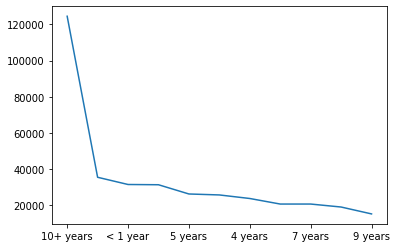

In [ ]:
df['emp_length'].value_counts().plot()

In [ ]:
# there's 'nan' a.k.a null data
df['emp_length'].unique()

array(['10+ years', nan, '5 years', '8 years', '4 years', '2 years',
       '6 years', '< 1 year', '7 years', '3 years', '9 years', '1 year'],
      dtype=object)

In [ ]:
dict_emplength = {'10+ years':1, '4 years':2, '< 1 year':3, '6 years':4, '9 years':5,
                  '2 years':6, '3 years':7, '8 years':8, '7 years':9, '5 years':10, '1 year':11}

In [ ]:
impute_df = df

In [ ]:
# drop the date, only for impute
impute_df = impute_df.drop('issue_d',axis=1)
impute_df = impute_df.drop('earliest_cr_line',axis=1)

In [ ]:
impute_df['emp_length'].isnull().sum()

18262

### **(NOT USED)** Test_df for convert 'emp_length' to numerical with NaN intact

I'm not going to use it, but let's save this steps

In [ ]:
#test_df = pd.DataFrame(impute_df['emp_length'])

In [ ]:
# check if it's nan
#np.isnan(test_df['emp_length'][35])==True

In [ ]:
# check if it's a str
#print(type(test_df['emp_length'][1])==str)
# check if NaN is float
#print(type(test_df['emp_length'][35]))

In [ ]:
# df['loan_status']=df['loan_status'].apply(lambda i: i+1 if i==0 else i-1)
#test_df['num_emp']=test_df['emp_length'].apply(lambda i: dict_emplength[i] if type(i)==str else i)

In [ ]:
#test_df.isnull().sum()

### Impute with SimpleImputer

In [ ]:
# SimpleImputer can only works with 2 columns of data
from sklearn.impute import SimpleImputer

In [ ]:
simple = SimpleImputer(strategy="most_frequent")

In [ ]:
test_df = impute_df[['sub_grade','emp_length']]

In [ ]:
# this'll result in array, not pd.DataFrame
# it'll take quiet some time to impute
test_df = simple.fit_transform(test_df)

In [ ]:
test_df = pd.DataFrame(test_df,columns=('sub_grade','emp_length'))

In [ ]:
# all missing data has been imputed
test_df.isnull().sum()

sub_grade     0
emp_length    0
dtype: int64

In [ ]:
# back to df, replace the 'emp_length' columns with the test_df
df['emp_length']= test_df['emp_length']

In [ ]:
# Check if df 'emp_length' still has null
df['emp_length'].isnull().sum()

0

### Replace 'emp_length' into categorical 1s & 0s

In [ ]:
df['emp_length'].unique()

array(['10+ years', '5 years', '8 years', '4 years', '2 years', '6 years',
       '< 1 year', '7 years', '3 years', '9 years', '1 year'],
      dtype=object)

In [ ]:
cat_emplength = pd.get_dummies(df['emp_length'])
cat_emplength.rename(columns={'10+ years':'EL_10+', '4 years':'EL_4', '< 1 year':'EL_less1', '6 years':'EL_6', 
                              '9 years':'EL_9','2 years':'EL_2', '3 years':'EL_3', '8 years':'EL_8', 
                              '7 years':'EL_7', '5 years':'EL_5', '1 year':'EL_1'},inplace=True)
cat_emplength.head(2)

,EL_1,EL_10+,EL_2,EL_3,EL_4,EL_5,EL_6,EL_7,EL_8,EL_9,EL_less1
0,0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.concat([df,cat_emplength],axis=1)
df = df.drop('emp_length',axis=1)
df.head(2)

,loan_amnt,60_mo_term,int_rate,installment,sub_grade,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,HO_ANY,HO_MORTGAGE,HO_NONE,HO_OTHER,HO_OWN,HO_RENT,VS_Not Verified,VS_Source Verified,VS_Verified,PPS_car,PPS_cc,PPS_debtcons,PPS_edu,PPS_homeimp,PPS_house,PPS_majorprc,PPS_medical,PPS_moving,PPS_other,PPS_reneweng,PPS_smallbus,PPS_vacation,PPS_wedd,APP_DIRECTPAY,APP_INDIVIDUAL,APP_JOINT,EL_1,EL_10+,EL_2,EL_3,EL_4,EL_5,EL_6,EL_7,EL_8,EL_9,EL_less1
0,35000.0,0,25.83,1407.01,32,165800.0,Mar-2014,1,7.42,Jul-2005,5.0,0.0,16521.0,153.0,5.0,1,0.0,0.0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,12000.0,1,16.55,295.34,17,45600.0,Nov-2015,1,38.98,Apr-2002,5.0,0.0,13880.0,152.5,11.0,1,5.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


## Impute 'mort_acc' using SimpleImputer

In [ ]:
df['mort_acc'].isnull().sum()

37461

In [ ]:
simple = SimpleImputer(strategy="most_frequent")

In [ ]:
impute_mort_acc_df = df[['total_acc']]

In [ ]:
impute_mort_acc_df['mort_acc'] = df[['mort_acc']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
impute_mort_acc_df.isnull().sum()

total_acc        0
mort_acc     37461
dtype: int64

In [ ]:
# impute using "most_frequent", since it mort_acc = Number of mortgage accounts.
# it doesn't have any calculation behind it.
impute_mort_acc_df = simple.fit_transform(impute_mort_acc_df)

In [ ]:
impute_mort_acc_df = pd.DataFrame(impute_mort_acc_df,columns=('total_acc','mort_acc'))

In [ ]:
impute_mort_acc_df.isnull().sum()

total_acc    0
mort_acc     0
dtype: int64

In [ ]:
# back to df, replace the 'mort_acc' columns with the impute_mort_acc_df
df['mort_acc']= impute_mort_acc_df['mort_acc']

In [ ]:
df['mort_acc'].isnull().sum()

0

## Impute 'revol_util' using Mean

In [ ]:
simple_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
revolutil_df = df[['revol_bal','revol_util']]

In [ ]:
revolutil_df = pd.DataFrame(simple_mean.fit_transform(revolutil_df),columns=('revol_bal','revol_util'))

In [ ]:
revolutil_df.isnull().sum()

revol_bal     0
revol_util    0
dtype: int64

In [ ]:
# back to df, replace the 'revol_util' columns with the revolutil_df
df['revol_util']= revolutil_df['revol_util']

In [ ]:
df.isnull().sum()

loan_amnt                 0
60_mo_term                0
int_rate                  0
installment               0
sub_grade                 0
annual_inc                0
issue_d                   0
loan_status               0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
initial_list_status       0
mort_acc                  0
pub_rec_bankruptcies    531
HO_ANY                    0
HO_MORTGAGE               0
HO_NONE                   0
HO_OTHER                  0
HO_OWN                    0
HO_RENT                   0
VS_Not Verified           0
VS_Source Verified        0
VS_Verified               0
PPS_car                   0
PPS_cc                    0
PPS_debtcons              0
PPS_edu                   0
PPS_homeimp               0
PPS_house                 0
PPS_majorprc              0
PPS_medical               0
PPS_moving          

## Calculate the gap between 'issue_d' vs 'earliest_cr_line'

In [ ]:
df.head(2)

,loan_amnt,60_mo_term,int_rate,installment,grade,sub_grade,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,HO_ANY,HO_MORTGAGE,HO_NONE,HO_OTHER,HO_OWN,HO_RENT,VS_Not Verified,VS_Source Verified,VS_Verified,PPS_car,PPS_cc,PPS_debtcons,PPS_edu,PPS_homeimp,PPS_house,PPS_majorprc,PPS_medical,PPS_moving,PPS_other,PPS_reneweng,PPS_smallbus,PPS_vacation,PPS_wedd,APP_DIRECTPAY,APP_INDIVIDUAL,APP_JOINT,EL_1,EL_10+,EL_2,EL_3,EL_4,EL_5,EL_6,EL_7,EL_8,EL_9,EL_less1
0,35000.0,0,25.83,1407.01,7,32,165800.0,Mar-2014,1,7.42,Jul-2005,5.0,0.0,16521.0,153.0,5.0,1,0,0.0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,12000.0,1,16.55,295.34,4,17,45600.0,Nov-2015,1,38.98,Apr-2002,5.0,0.0,13880.0,152.5,11.0,1,5,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
dict_months = {'Jan':1,'Feb':2, 'Mar':3,'Apr':4,
               'May':5,'Jun':6,'Jul':7,'Aug':8,
               'Sep':9,'Oct':10,'Nov':11,'Dec':12}

### convert 'issue_d' into date time format

In [ ]:
issue_df = df[['issue_d']]

In [ ]:
issue_df = pd.DataFrame(list(issue_df['issue_d'].apply(lambda x:x.split('-'))),columns=('iss_month','iss_year'))

In [ ]:
# test_df['num_grade']=test_df['grade'].apply(lambda i: dict_grade[i])
issue_df['month']=issue_df['iss_month'].apply(lambda i: dict_months[i])

In [ ]:
#df['term'] = df['term'].astype('category')
issue_df['year'] = issue_df['iss_year'].astype('int64')

In [ ]:
issue_df['day'] = 1

In [ ]:
issue_df['timestamp']=pd.to_datetime(issue_df[["year", "month", "day"]])

In [ ]:
issue_df = issue_df.drop(columns=issue_df.columns[:5],axis=1)

### convert 'earliest_cr_line' into date time format

In [ ]:
earlier_df = df[['earliest_cr_line']]
earlier_df = pd.DataFrame(list(earlier_df['earliest_cr_line'].apply(lambda x:x.split('-'))),columns=('earl_month','year'))

In [ ]:
earlier_df['month']= earlier_df['earl_month'].apply(lambda i: dict_months[i])
earlier_df['year'] = earlier_df['year'].astype('int64')
earlier_df['day'] = 1

In [ ]:
earlier_df['timestamp']=pd.to_datetime(earlier_df[["year", "month", "day"]])

In [ ]:
earlier_df = earlier_df.drop(columns=earlier_df.columns[:4],axis=1)

### Calculate months gap between 'issue_d' vs 'earliest_cr_line'

source :

https://stackoverflow.com/questions/42822768/pandas-number-of-months-between-two-dates

In [ ]:
timediff_df = issue_df

In [ ]:
timediff_df['earliest_date']=earlier_df

In [ ]:
timediff_df = timediff_df.rename(columns={'timestamp':'issue_date'})

In [ ]:
# df['nb_months'] = ((df.date2 - df.date1)/np.timedelta64(1, 'M'))
timediff_df['month_diff']=((timediff_df['issue_date'] - timediff_df['earliest_date'])/np.timedelta64(1, 'M'))

In [ ]:
# df['nb_months'] = df['nb_months'].astype(int)
timediff_df['month_diff'] = timediff_df['month_diff'].astype(int)

### Add month_diff into df & drop 'issue_d' & 'earliest_cr_line' columns

In [ ]:
df['month_diff']=timediff_df['month_diff']

In [ ]:
df = df.drop('issue_d',axis=1)
df = df.drop('earliest_cr_line',axis=1)

## Let's Delete/Drop 'pub_rec_bankruptcies' index

since this is the last steps of Replace/Imputing steps, only 'pub_rec_bankruptcies' left. we will delete the index with this nan, since it's only 535 data it won't impact much

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391769 entries, 0 to 391768
Data columns (total 53 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             391769 non-null  float64
 1   60_mo_term            391769 non-null  int8   
 2   int_rate              391769 non-null  float64
 3   installment           391769 non-null  float64
 4   sub_grade             391769 non-null  int64  
 5   annual_inc            391769 non-null  float64
 6   loan_status           391769 non-null  int64  
 7   dti                   391769 non-null  float64
 8   open_acc              391769 non-null  float64
 9   pub_rec               391769 non-null  float64
 10  revol_bal             391769 non-null  float64
 11  revol_util            391769 non-null  float64
 12  total_acc             391769 non-null  float64
 13  initial_list_status   391769 non-null  int64  
 14  mort_acc              391769 non-null  float64
 15  

In [ ]:
new_df = df.dropna(axis=0, subset=['pub_rec_bankruptcies'])

In [ ]:
new_df.head()

,loan_amnt,60_mo_term,int_rate,installment,sub_grade,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,HO_ANY,HO_MORTGAGE,HO_NONE,HO_OTHER,HO_OWN,HO_RENT,VS_Not Verified,VS_Source Verified,VS_Verified,PPS_car,PPS_cc,PPS_debtcons,PPS_edu,PPS_homeimp,PPS_house,PPS_majorprc,PPS_medical,PPS_moving,PPS_other,PPS_reneweng,PPS_smallbus,PPS_vacation,PPS_wedd,APP_DIRECTPAY,APP_INDIVIDUAL,APP_JOINT,EL_1,EL_10+,EL_2,EL_3,EL_4,EL_5,EL_6,EL_7,EL_8,EL_9,EL_less1
0,35000.0,0,25.83,1407.01,32,165800.0,1,7.42,5.0,0.0,16521.0,153.0,5.0,1,0.0,0.0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,12000.0,1,16.55,295.34,17,45600.0,1,38.98,5.0,0.0,13880.0,152.5,11.0,1,5.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,10000.0,0,14.16,342.56,12,91000.0,1,20.94,9.0,0.0,9344.0,150.7,37.0,1,6.0,0.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,25000.0,1,20.49,669.19,22,100000.0,0,15.16,5.0,0.0,20133.0,148.0,7.0,0,0.0,0.0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,12600.0,0,8.39,397.11,5,96011.0,1,11.56,9.0,0.0,20033.0,146.1,22.0,0,4.0,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391238 entries, 0 to 391768
Data columns (total 53 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             391238 non-null  float64
 1   60_mo_term            391238 non-null  int8   
 2   int_rate              391238 non-null  float64
 3   installment           391238 non-null  float64
 4   sub_grade             391238 non-null  int64  
 5   annual_inc            391238 non-null  float64
 6   loan_status           391238 non-null  int64  
 7   dti                   391238 non-null  float64
 8   open_acc              391238 non-null  float64
 9   pub_rec               391238 non-null  float64
 10  revol_bal             391238 non-null  float64
 11  revol_util            391238 non-null  float64
 12  total_acc             391238 non-null  float64
 13  initial_list_status   391238 non-null  int64  
 14  mort_acc              391238 non-null  float64
 15  

# Should you standardize binary (1 or 0) variables?

answer : no, based on this discussion link

https://stats.stackexchange.com/questions/59392/should-you-ever-standardise-binary-variables

# EXPORT our new_df into csv to be processed with ML Model

In [ ]:
folderpath ='/content/drive/MyDrive/13. Python/Machine Learning/TensorFlow_FILES/DATA/'

In [ ]:
# df.to_csv("file.csv", encoding="utf-8") 
new_df.to_csv(folderpath+"lending_club_clean_convert2.csv", encoding="utf-8", index=False)